In this experiment, we will explore supervised learning techniques for regression and
classification tasks. We will use Python and the Scikit-learn library to implement
linear regression, polynomial regression, random forest classifier, and SVM models.
We will also evaluate the models using appropriate evaluation measures.


## Scikit-learn installation

1.1 Regression
Regression is a statistical technique that relates a continuous dependent variable to
one or more independent variables. In this part, we will fit different regression models
on a toy dataset.
1.1.1 Generating examples
We will start by generating a toy dataset. Generate 40 examples using the following
function
f(x) = sin(x) + ϵ,
where ϵ is sampled from a normal distribution with standard deviation 0.1, and
x ∈ [0, 1). Split the samples to into two equal sets: training set, and testing set.


In [2]:

import numpy as np
def true_fun(X):
 return np.sin(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1
X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1


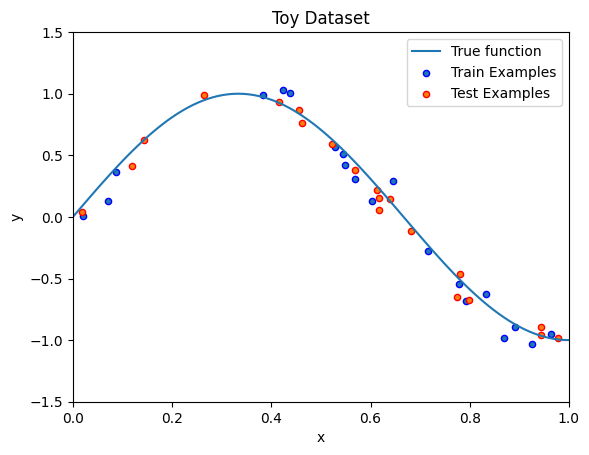

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()


# 1.1.2 Linear regression


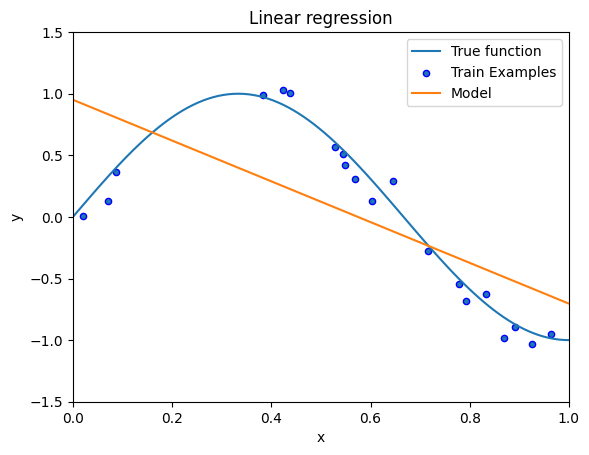

In [4]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()


# Task 1: Compute the mean squared error of the learned linear model on the test set.

In [5]:
from sklearn.metrics import mean_squared_error

# Step 1: Make predictions using the trained model
y_pred = linear_regression.predict(X_test[:, np.newaxis])

# Step 2: Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1736489094130998


# 1.1.3 Polynomial regression


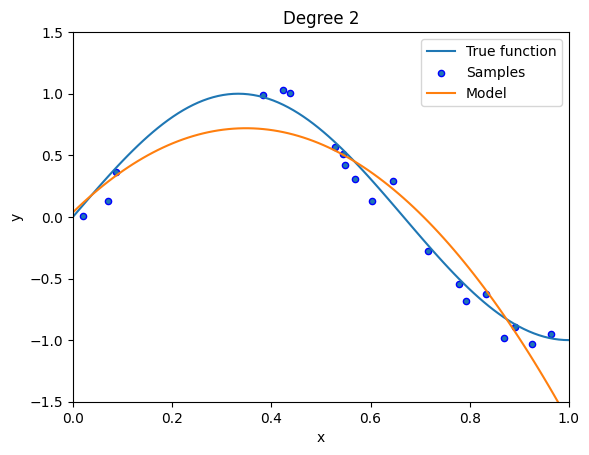

In [6]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(2, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 2")
plt.show()



#Task 2: Repeat the previous part with polynomials with degree 4 and 15.


Degree 4

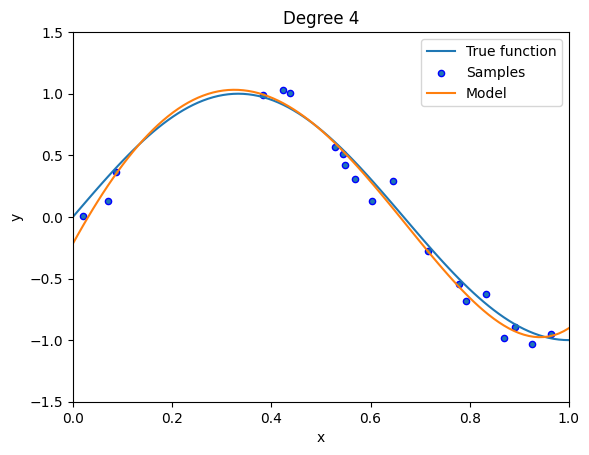

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(4, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 4")
plt.show()

degree 15

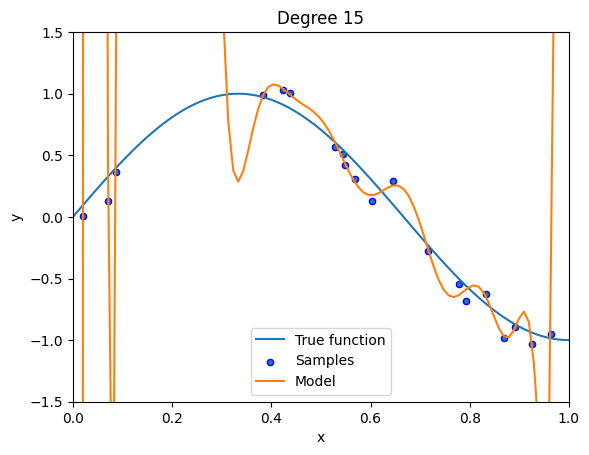

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(15, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 15")
plt.show()

# Task 3: Compute the mean squared error of the learned models on the test set. Which model is the best?

In [8]:
from sklearn.metrics import mean_squared_error

degrees = [2, 4, 15]

for degree in degrees:
  polynomial_features = PolynomialFeatures(degree, include_bias=True)

  q_model = LinearRegression()
  q_model.fit(polynomial_features.fit_transform(X_test[:, np.newaxis]), y_test)

  X_test_poly = polynomial_features.transform(X_test[:, np.newaxis])
  y_pred = q_model.predict(X_test_poly)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)

  print(f"Mean Squared Error on Test Set (degree " + str(degree) + "): ", mse)




Mean Squared Error on Test Set (degree 2):  0.04584642051008529
Mean Squared Error on Test Set (degree 4):  0.0037038518144928514
Mean Squared Error on Test Set (degree 15):  0.0009539349945650803


# Classification

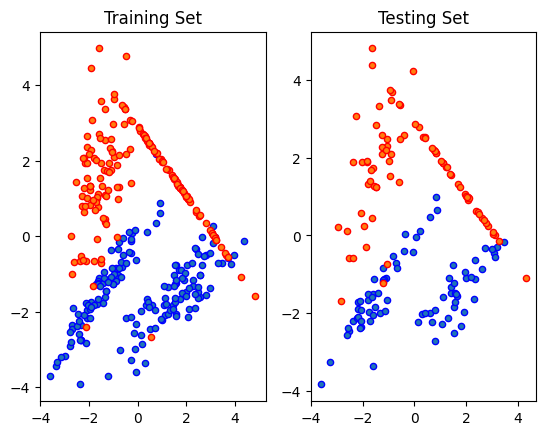

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
n_informative=2, n_redundant=0,
n_clusters_per_class=2, random_state=0,
shuffle=True, class_sep=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.33, random_state=0)
colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")
for c in np.unique(y_train):
  ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
[X_train[i, 1] for i in np.where(y_train==c)],
edgecolor=colors[c], s=20, label="Samples")
  ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] ,
[X_test[i, 1] for i in np.where(y_test==c)],
edgecolor=colors[c], s=20, label="Samples")

# Classification with random forests

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2,
criterion="entropy",
max_features="sqrt", max_samples=.8,
random_state=0)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


For classification, accuracy is not the only used metrics. There are many other
metrics such as precision, recall, F1-score, ...etc. All of these metrics can be derived
form the the confusion matrix. The following code computes the confusion matrix
for the random forest trained in the previous part.

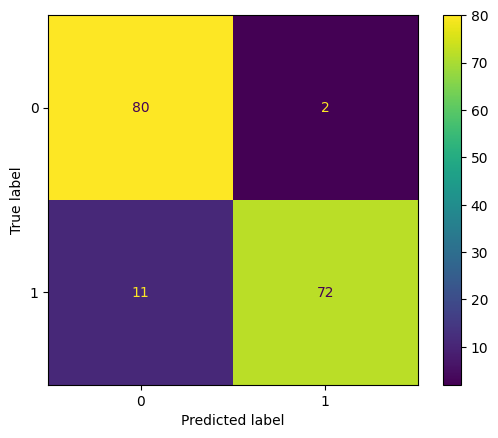

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)
disp.plot()

Task 4: In the previous example, compute the precision, recall, F1-score. Discuss when accuracy is not the most suitable metric.

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


recall = recall_score(y_test, y_pred)
print("Recall:", recall)


f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Precision: 0.972972972972973
Recall: 0.8674698795180723
F1 Score: 0.9171974522292994


Task 5: Train different random forests by changing the number of trees from 2 to 15.
Plot the training and testing accuracy of the trained models vs the number of trees.What do you notice?

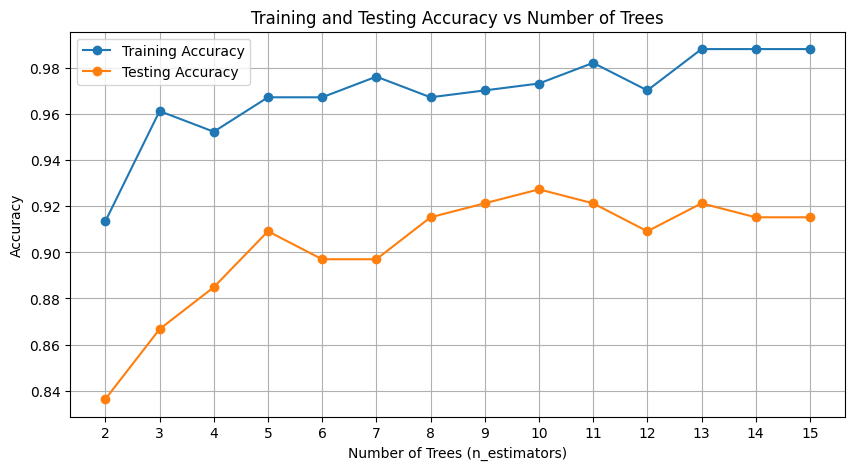

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=2, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33, random_state=0)

train_accuracies = []
test_accuracies = []
n_trees = range(2, 16)

for n in n_trees:
    clf = RandomForestClassifier(n_estimators=n,
                                 criterion="entropy",
                                 max_features="sqrt",
                                 max_samples=0.8,
                                 random_state=0)
    clf.fit(X_train, y_train)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))


plt.figure(figsize=(10, 5))
plt.plot(n_trees, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_trees, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracy vs Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(n_trees)
plt.legend()
plt.grid()
plt.show()


#Decision Surface

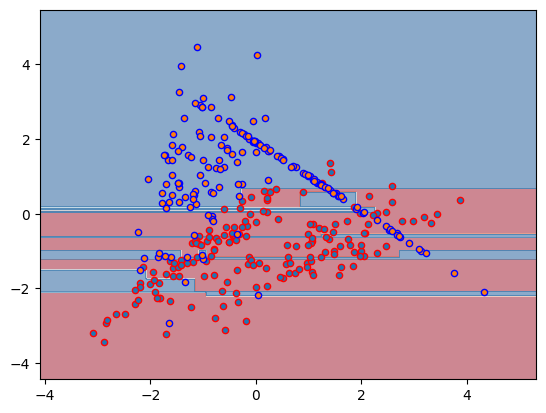

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
cmap = plt.cm.RdBu
plot_step = 0.02 # fine step width for decision surface contours
clf = RandomForestClassifier(n_estimators=2, criterion="entropy",
max_features="sqrt", max_samples=.8,
random_state=0)
clf.fit(X_train, y_train)
# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))
estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
  Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
colors = ["r", "b"]
for c in np.unique(y_train):
  plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
[X_train[i, 1] for i in np.where(y_train==c)],
edgecolor=colors[c], s=20, label="Samples")

# Task 6: Draw the decision surface for a set of random forests with different number of trees. Do you notice any pattern?

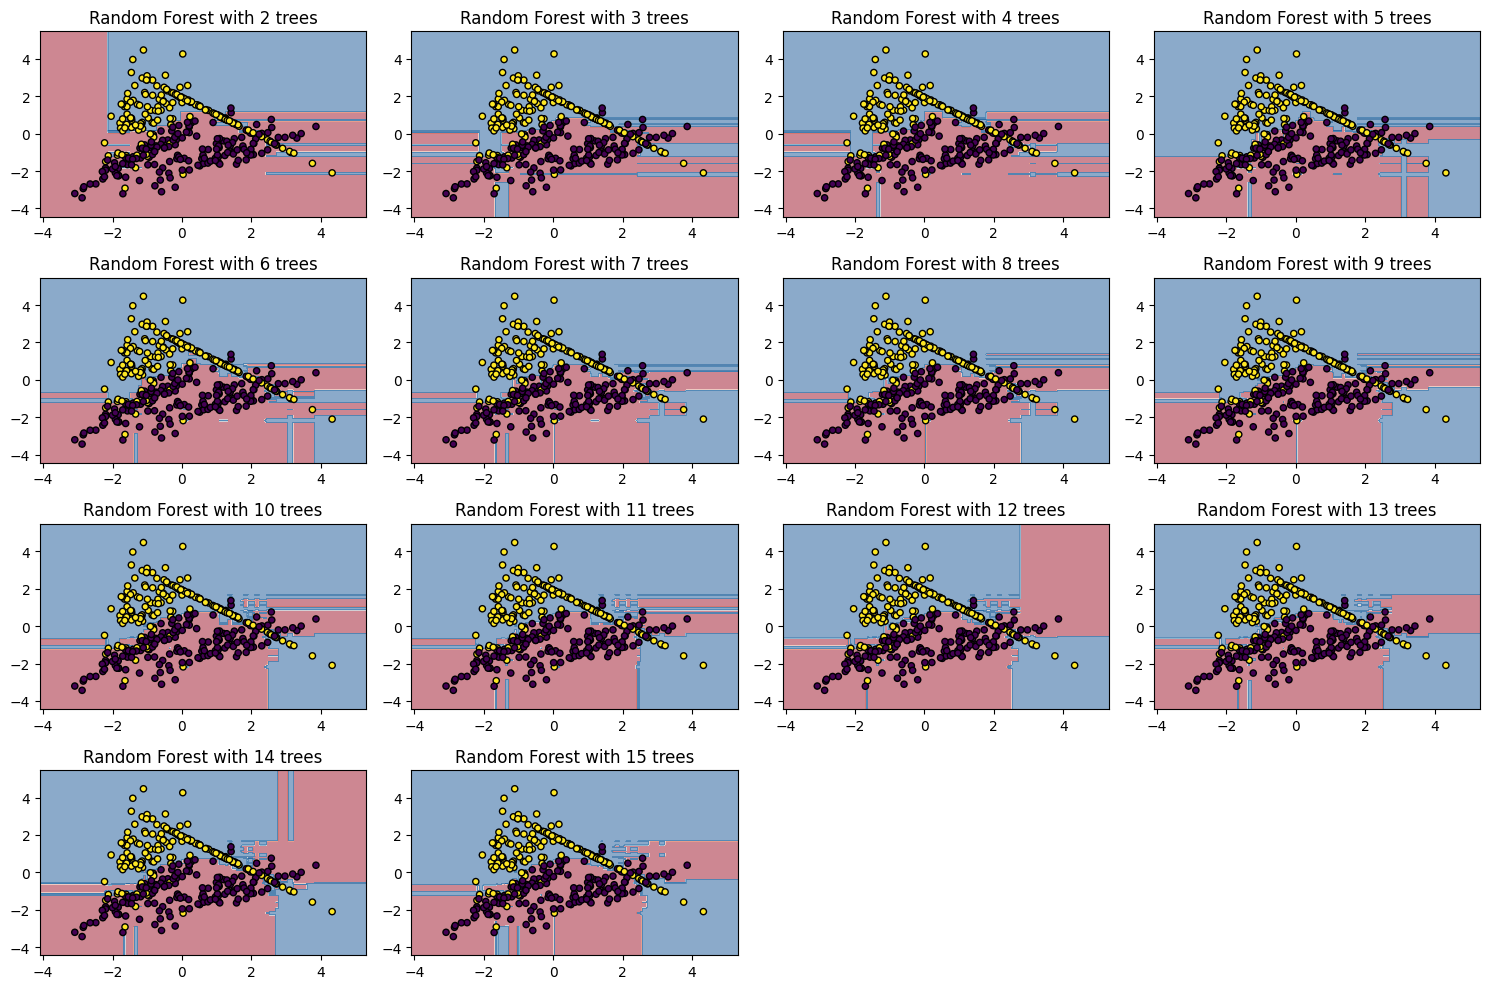

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=500, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


cmap = plt.cm.RdBu
plot_step = 0.02

n_trees = range(2, 16)

plt.figure(figsize=(15, 10))

for i, n in enumerate(n_trees):
    clf = RandomForestClassifier(n_estimators=n, criterion="entropy",
                                 max_features="sqrt", max_samples=.8,
                                 random_state=0)
    clf.fit(X_train, y_train)

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.subplot(4, 4, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
    plt.title(f'Random Forest with {n} trees')

plt.tight_layout()
plt.show()


# 1.2.3 Classification with SVM

In [16]:
from sklearn import svm
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.8417910447761194
Testing Accuracy:  0.8363636363636363


# Task 7: Draw the decision surface for the SVM model in the previous example.


<ipython-input-17-01443e8c5184>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')


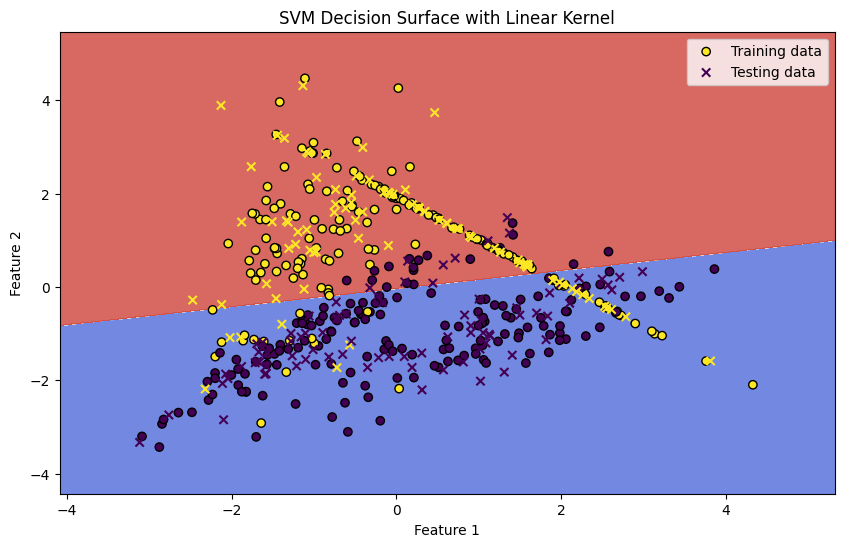

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create a mesh grid for plotting
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')
plt.title("SVM Decision Surface with Linear Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Task 8: Train an SVM model with rbf kernel and draw its decision boundary. What
do you notice?

<ipython-input-18-49f8d3cdacd1>:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')


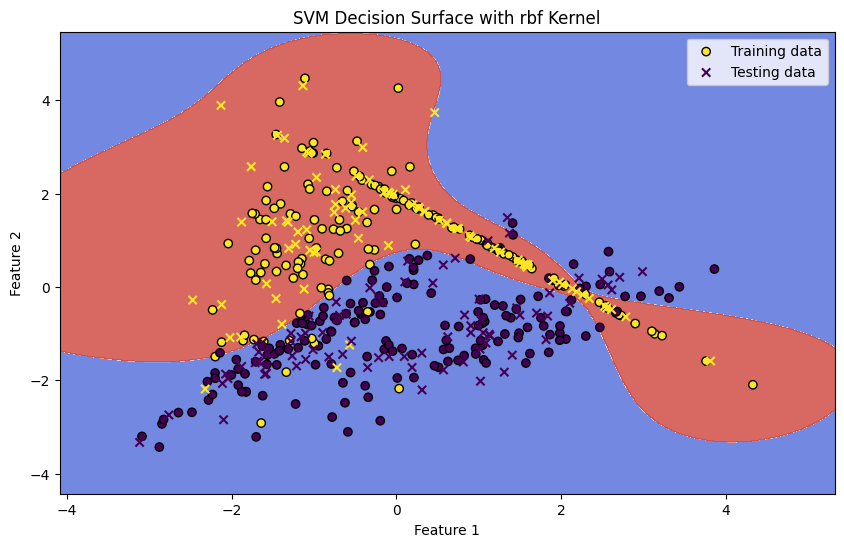

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
clf = svm.SVC(kernel="rbf", C=100)
clf.fit(X_train, y_train)


# Create a mesh grid for plotting
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')
plt.title("SVM Decision Surface with rbf Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Task 9: Repeat task 8 but with C equal 0.5, 1, 100, and 1000. What do you notice?

<ipython-input-42-09ae17edaab6>:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')


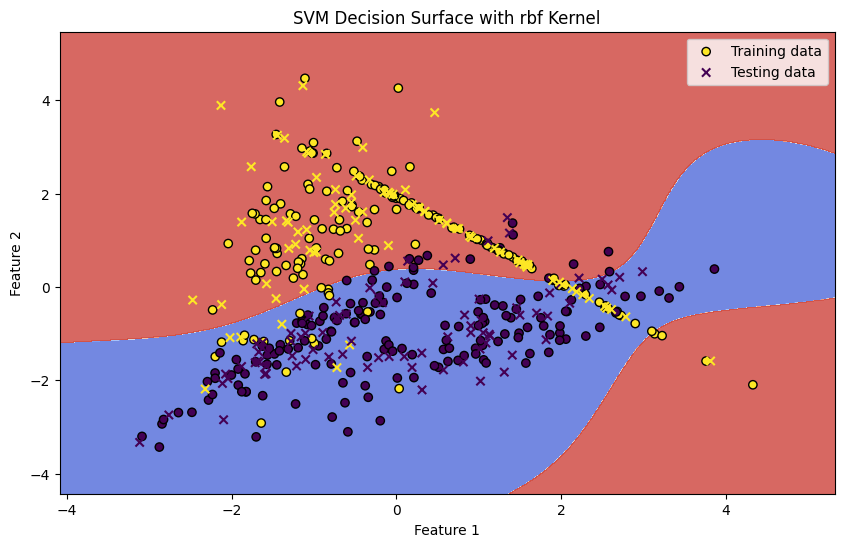

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
clf = svm.SVC(kernel="rbf", C= 0.5)
clf.fit(X_train, y_train)


# Create a mesh grid for plotting
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')
plt.title("SVM Decision Surface with rbf Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

<ipython-input-43-bb351c4f8d5d>:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')


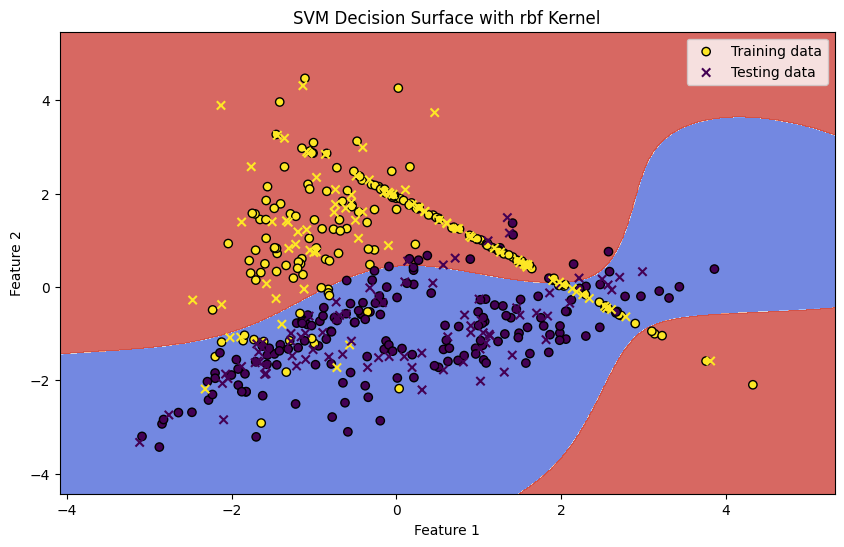

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
clf = svm.SVC(kernel="rbf", C= 1)
clf.fit(X_train, y_train)


# Create a mesh grid for plotting
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')
plt.title("SVM Decision Surface with rbf Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

<ipython-input-44-8b0a8842a428>:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')


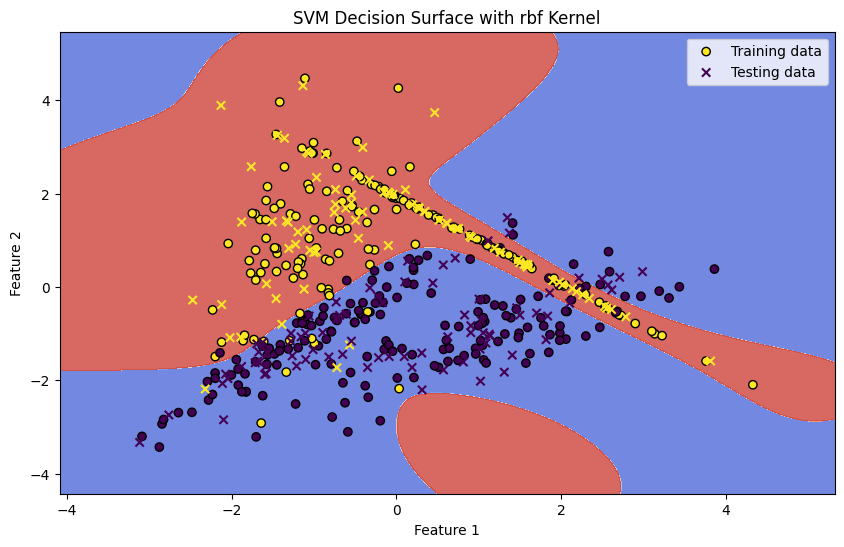

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
clf = svm.SVC(kernel="rbf", C= 1000)
clf.fit(X_train, y_train)


# Create a mesh grid for plotting
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Testing data')
plt.title("SVM Decision Surface with rbf Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


**Task 10: GridSearchCV has an attribute called cv results , which is a dict with
keys as column headers and values as columns. Print it and try to explain the values that you get.**

In [21]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00261278, 0.00199609, 0.00405512, 0.00236092, 0.01387453,
       0.00361967]), 'std_fit_time': array([5.71077317e-04, 7.40257092e-05, 5.27260078e-04, 9.03811595e-05,
       1.12066762e-03, 9.17718681e-04]), 'mean_score_time': array([0.00100255, 0.00104022, 0.0009985 , 0.00103226, 0.00117569,
       0.00117741]), 'std_score_time': array([1.70253637e-04, 2.53536608e-05, 1.07907206e-04, 2.99886979e-05,
       3.06244558e-05, 3.11105701e-04]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
             mask=[False, False, False, False, False, False],
       fill_value=999999), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}, {'C': 100, 'kernel': 'linear'}, {'C': 100, 'kernel': 'rbf'}

mean_fit_time and std_fit_time: Average time and its variation to fit the model for each parameter set.

mean_score_time and std_score_time: Average time and variation to score the model for each parameter set.

param_C and param_kernel: The parameter values for C and kernel being tested.
params: Dictionary of parameter combinations.

splitX_test_score: Test score for each fold (X being the fold number).

mean_test_score and std_test_score: Average test score and its variation across all folds for each parameter set.

rank_test_score: Rank of parameter sets by mean test score (1 = best).